In [ ]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import requests
import sys
import matplotlib.pyplot as plt

# Google API Key
from config import gkey
pd.set_option("display.max_rows", None)

In [3]:
fastfood_us_df = pd.read_csv("fastfood_census.csv")
fastfood_us_df.head()

,name,country,latitude,longitude,Street Adress,province,state,region,division,price_level,rating,user_ratings_total
0,Sonic Drive-In,US,29.814697,-90.814742,"800 N Canal Blvd, Thibodaux, LA 70301",Thibodaux,LA,South,West South Central,1.0,4.3,479.0
1,Taco Bell,US,35.803788,-83.580553,"206 Wears Valley Rd, Pigeon Forge, TN 37863",Pigeon Forge,TN,South,East South Central,1.0,3.3,1029.0
2,Arby's,US,35.782339,-83.551408,"3652 Parkway, Pigeon Forge, TN 37863",Pigeon Forge,TN,South,East South Central,1.0,3.9,1620.0
3,Steak 'n Shake,US,33.562738,-84.321143,"2118 Mt Zion Parkway, Morrow, GA 30260",Morrow,GA,South,South Atlantic,1.0,3.4,5287.0
4,Wendy's,US,42.368823,-83.138251,"9768 Grand River Ave, Detroit, MI 48204",Detroit,MI,Midwest,East North Central,1.0,3.6,1560.0


In [ ]:
fastfood_us_df['name']=fastfood_us_df['name'].replace({"Chick-Fil-A":'Chick-fil-A'
                                          })

In [4]:
fastfood_us =fastfood_us_df.dropna()

In [5]:
#fastfood_us_df.to_csv('fastfood_census.csv', index = False)

In [6]:
fastfood_us['name'].value_counts()

McDonald's                1628
Taco Bell                  876
Burger King                711
Subway                     654
Arby's                     569
Wendy's                    531
Jack in the Box            290
Chick-fil-A                194
Pizza Hut                  180
Domino's Pizza             175
Dairy Queen                172
Sonic Drive-In             170
KFC                        155
Carl's Jr.                 108
Jimmy John's               102
Hardee's                    96
Krystal                     68
Panera Bread                63
Culver's                    63
Dunkin' Donuts              59
Del Taco                    55
Steak 'n Shake              49
SUBWAY                      49
In-N-Out Burger             47
Taco John's                 44
Panda Express               43
Long John Silver's          43
Checkers                    36
Whataburger                 36
Waffle House                35
Boston Market               33
Chipotle Mexican Grill      33
Bojangle

In [7]:
threshold = 16 # Anything that occurs less than this will be removed.
value_counts = fastfood_us['name'].value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <=threshold].index
fastfood_us.replace(to_remove, np.nan, inplace=True)

fastfood_us=fastfood_us.dropna()

fastfood_us['name'].value_counts()

McDonald's                1628
Taco Bell                  876
Burger King                711
Subway                     654
Arby's                     569
Wendy's                    531
Jack in the Box            290
Chick-fil-A                194
Pizza Hut                  180
Domino's Pizza             175
Dairy Queen                172
Sonic Drive-In             170
KFC                        155
Carl's Jr.                 108
Jimmy John's               102
Hardee's                    96
Krystal                     68
Panera Bread                63
Culver's                    63
Dunkin' Donuts              59
Del Taco                    55
Steak 'n Shake              49
SUBWAY                      49
In-N-Out Burger             47
Taco John's                 44
Panda Express               43
Long John Silver's          43
Checkers                    36
Whataburger                 36
Waffle House                35
Boston Market               33
Chipotle Mexican Grill      33
Bojangle

In [8]:
fastfood_us.head()

,name,country,latitude,longitude,Street Adress,province,state,region,division,price_level,rating,user_ratings_total
0,Sonic Drive-In,US,29.814697,-90.814742,"800 N Canal Blvd, Thibodaux, LA 70301",Thibodaux,LA,South,West South Central,1.0,4.3,479.0
1,Taco Bell,US,35.803788,-83.580553,"206 Wears Valley Rd, Pigeon Forge, TN 37863",Pigeon Forge,TN,South,East South Central,1.0,3.3,1029.0
2,Arby's,US,35.782339,-83.551408,"3652 Parkway, Pigeon Forge, TN 37863",Pigeon Forge,TN,South,East South Central,1.0,3.9,1620.0
3,Steak 'n Shake,US,33.562738,-84.321143,"2118 Mt Zion Parkway, Morrow, GA 30260",Morrow,GA,South,South Atlantic,1.0,3.4,5287.0
4,Wendy's,US,42.368823,-83.138251,"9768 Grand River Ave, Detroit, MI 48204",Detroit,MI,Midwest,East North Central,1.0,3.6,1560.0


In [30]:
fastfood_counts = fastfood_us['region'].value_counts()

In [31]:
fastfood_US_counts = fastfood_counts.rename_axis("region")

In [41]:
fastfood_US_counts=fastfood_US_counts.head(4)
fastfood_US_counts

region
South        2978
Midwest      1957
West         1857
Northeast     865
Name: region, dtype: int64

([<matplotlib.patches.Wedge at 0x7f925dd123a0>,
 [Text(-0.9192533237184914, -0.7713451411868145, 'South'),
  Text(0.9932192030695878, -0.4727743802849444, 'Midwest'),
  Text(0.8646583871757344, 0.6799749065124814, 'West'),
  Text(-0.25933484220301817, 1.068992721967524, 'Northeast')],
 [Text(-0.5362311055024532, -0.4499513323589751, '44.4%'),
  Text(0.5417559289470478, -0.25787693470087875, '19.2%'),
  Text(0.47163184755040055, 0.3708954035522625, '16.2%'),
  Text(-0.14145536847437354, 0.583086939255013, '20.2%')])

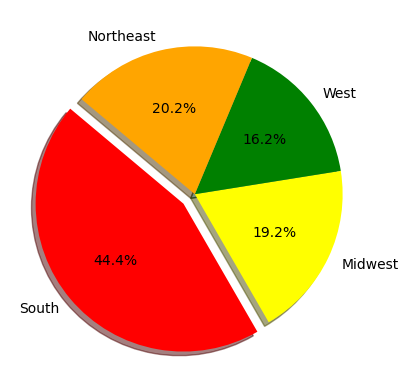

In [44]:
# Pie Chart Parameters
labels = ["South", "Midwest", "West", "Northeast"]
sizes = [220, 95, 80, 100]
colors = ["red", "yellow", "green", "orange"]
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)